# **Error Correction with the Shor Code**
---

## **Introduction** 
In this project I implement, simulate, and analyze the first ever error correction code proposed that can handle *any* single qubit errors (bit-flips, phase-flips, or others) using the Shor code (Sho95).

<br>

## **Description**
The Shor code is a natural extension of the Bit- and Phase- flip codes that avoid syndrome measurements where:

* A **bit-flip error** means $|0\rangle$ unintentionally turning into $|1\rangle$ or vice versa.
* A **phase-flip error** means $|+\rangle$ unintentionally turning into $|-\rangle$ or vice versa.

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

<br>

## **Structure of the project**
> **Part 1**: Defining the Components
>
>> **Part 1.1**: The Phase-Flip Code
>>
>> **Part 1.2**: The Bit-Flip Code
>
> **Part 2**: Implementing the Shor Code
>
> **Part 3**: Analyzing the Shor Code
>

<br>

---

## **Importing from Qiskit**
---

In [1]:
#!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

from random import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## **Part 1: Defining the Components**
---

**Part 1.1**: The 3-qubit phase-flip code.

**Part 1.2**: The 3-qubit bit-flip code.

---
### **Part 1.1: The Phase-Flip Code**

In this section, I have defined two circuits pertaining to the phase-flip code:
1. `phaseflip_encode`: A 3-qubit phase-flip logical to physical encoding.
1. `phaseflip_correct`: A 3-qubit phase-flip physical error detection and correction circuit.


Creating of the `phaseflip_encode` circuit that encodes a logical state into a 3-qubit phase-flip code. Steps:

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

##### **1. Initializing a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [2]:
phaseflip_encode = QuantumCircuit(3,1)

##### **2. Entangling the state of $q_0$ with the other two qubits.**

I have applied two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [3]:
phaseflip_encode.cx(0,1)
phaseflip_encode.cx(0,2)

##### **3. Putting all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

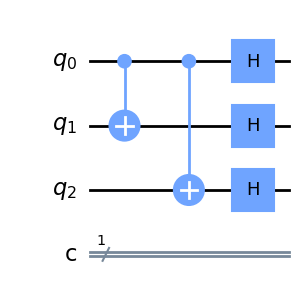

In [4]:
phaseflip_encode.h(range(3))
#phaseflip_encode.measure_all()

phaseflip_encode.draw()

Creating the `phaseflip_correct` circuit that detects and corrects errors in a 3-qubit phase-flip code.

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit I am correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [5]:
phaseflip_correct = QuantumCircuit(3,1)

##### **2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.**

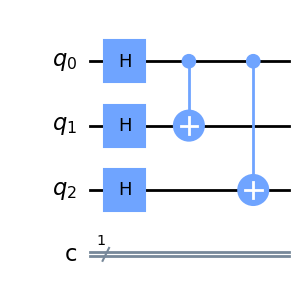

In [6]:
phaseflip_correct.h(range(3))


phaseflip_correct.cx(0, 1)
phaseflip_correct.cx(0, 2)


phaseflip_correct.draw()

##### **3. Correct any errors using a Toffoli gate.**



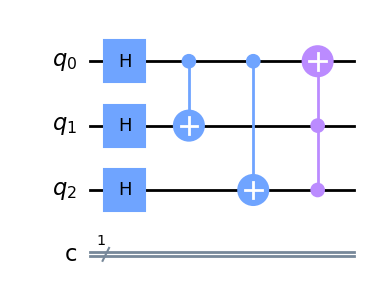

In [7]:
phaseflip_correct.ccx(1,2,0)
phaseflip_correct.draw()

Simulating the full phase-flip code for the $|+\rangle$ state without errors
1. Combining the encoding and correcting circuits using `.compose(...)`.
2. Comparing the initial and final statevector.

##### **1. Combining the encoding and correcting circuits using `.compose(...)`.**

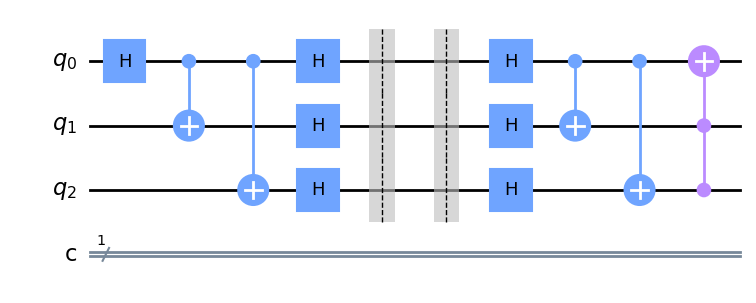

In [8]:
full_code = QuantumCircuit(3, 1)

# ENCODING

# Preparing the initial state and save its statevector
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# ERRORS

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

I have used the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [9]:
initial_state.equiv(final_state)

True

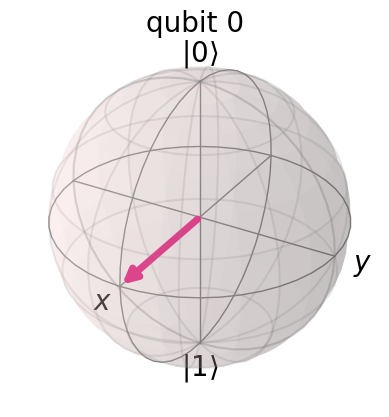

In [10]:
initial_state.draw(output = 'bloch')

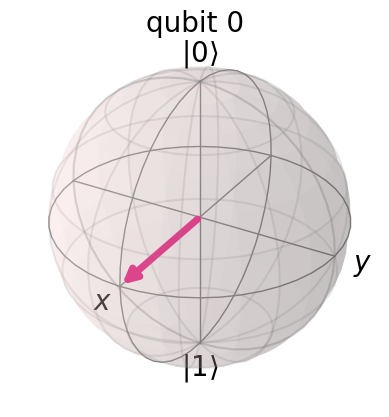

In [11]:
final_state.draw(output = 'bloch')

Simulation of the full phase-flip code for the $|-\rangle$ state without errors:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

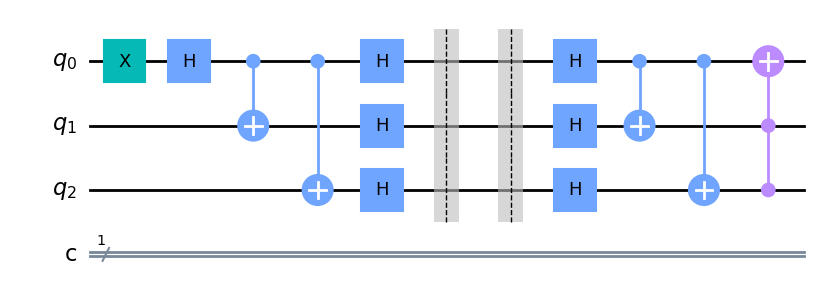

In [12]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# ERRORS
# NONE

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [13]:
initial_state.equiv(final_state)

True

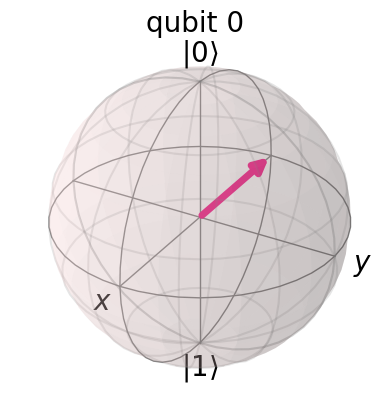

In [14]:
initial_state.draw(output = 'bloch')

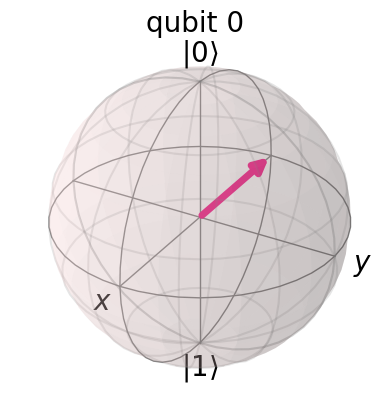

In [15]:
final_state.draw(output = 'bloch')

Simulation of the full phase-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0
1. Combining the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
2. Comparing the initial and final statevector.

##### **1. Combining the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

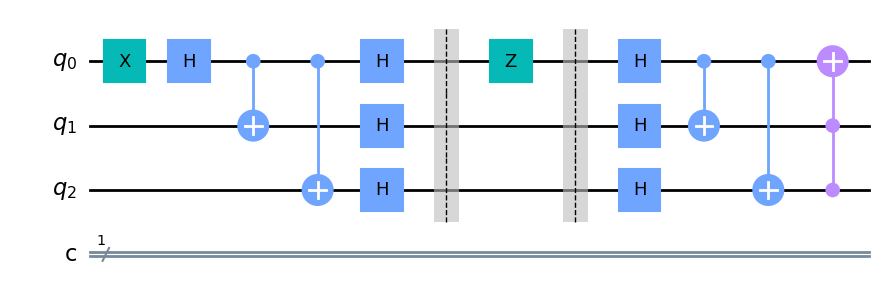

In [16]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# Phase-flip error
full_code.z(0)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [17]:
initial_state.equiv(final_state)

True

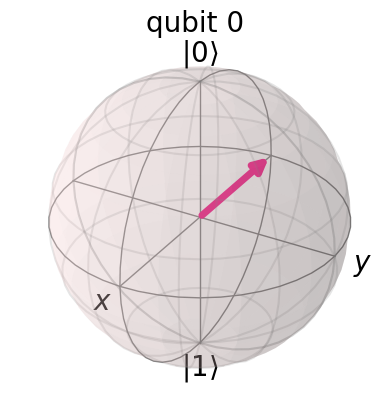

In [18]:
initial_state.draw(output = 'bloch')

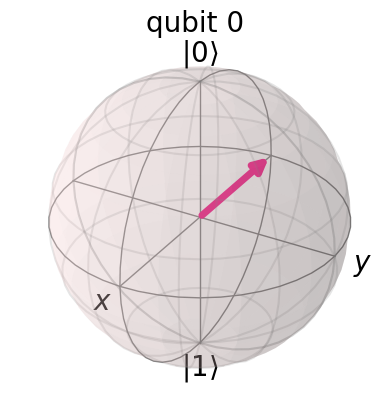

In [19]:
final_state.draw(output = 'bloch')

Simulating the full phase-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
2. Compare the initial and final statevector.

##### **1. Combining the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

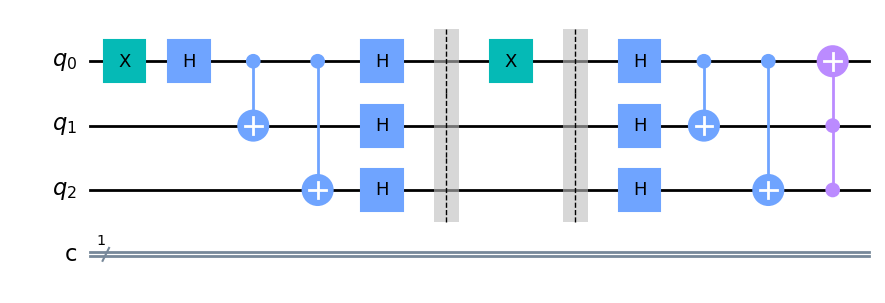

In [20]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# Bit-flip Error
full_code.x(0)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [21]:
initial_state.equiv(final_state)

False

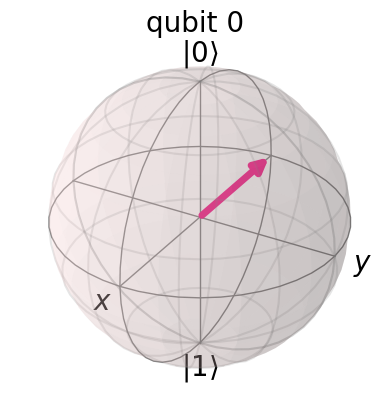

In [22]:
initial_state.draw(output = 'bloch')

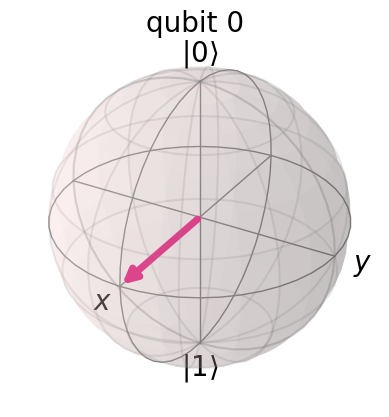

In [23]:
final_state.draw(output = 'bloch')

---
### **Part 1.2: The Bit-Flip Code**


In this section, I have defined two circuits pertaining to the bit-flip code:
1. `bitflip_encode`: A 3-qubit bit-flip logical to physical encoding.
1. `bitflip_correct`: A 3-qubit bit-flip physical error detection and correction circuit.


Creating the `bitflip_encode` circuit that encodes a logical state into a 3-qubit bitflip code.
1. Initializing a circuit with 3 qubits.
2. Entangling the state of $q_0$ with the other qubits.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit I'm correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [24]:
bitflip_encode = QuantumCircuit(3,1)

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [25]:
bitflip_encode.cx(0,1)
bitflip_encode.cx(0,2)

Creating the `bitflip_correct` circuit that detects and corrects errors in a 3-qubit bit-flip code. 
1. Initializing a circuit with 3 qubits.
2. Detecting any errors by checking that the parity of the 3 qubits match using CNOTs.
3. Correcting any errors using a Toffoli gate.

##### **1. Initializing a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit I'm correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [26]:
bitflip_correct = QuantumCircuit(3,1)

##### **2. Detecting any errors by checking that the parity of the 3 qubits match using CNOTs.**

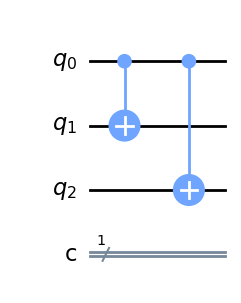

In [27]:
bitflip_correct.cx(0,1)
bitflip_correct.cx(0,2)

bitflip_correct.draw()

##### **3. Correcting any errors using a Toffoli gate.**

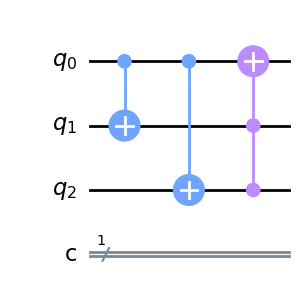

In [28]:
bitflip_correct.ccx(2,1,0)

bitflip_correct.draw()

Simulating the full bit-flip code for the $|0\rangle$ state without errors
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

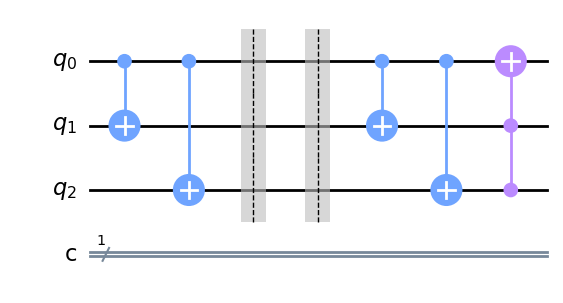

In [29]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |0> and save its statevector

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# ERRORS

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [30]:
initial_state.equiv(final_state)

True

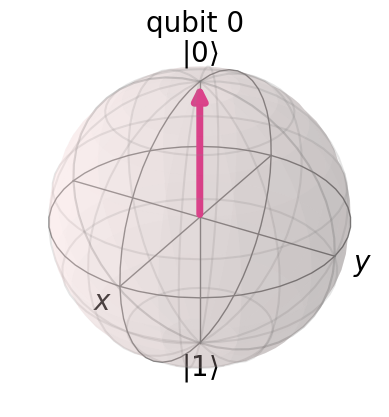

In [31]:
initial_state.draw(output = 'bloch')

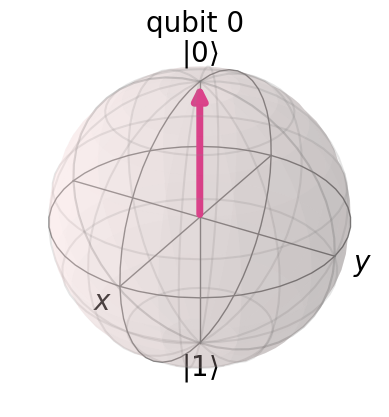

In [32]:
final_state.draw(output = 'bloch')

Simulating the full bit-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0
1. Combining the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
2. Comparing the initial and final statevector.

##### **1. Combining the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

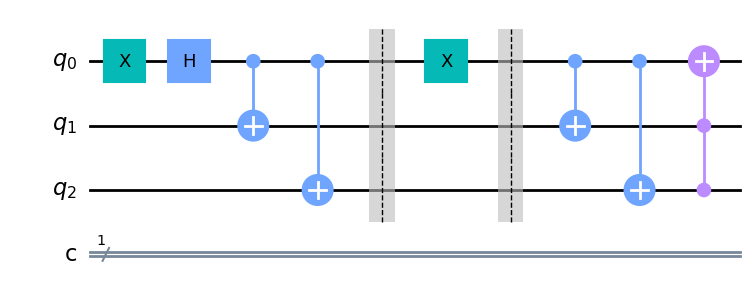

In [33]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# Bit-flip Error
full_code.x(0)
full_code.barrier()

# DETECTION AND CORRECTION
full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [34]:
initial_state.equiv(final_state)

True

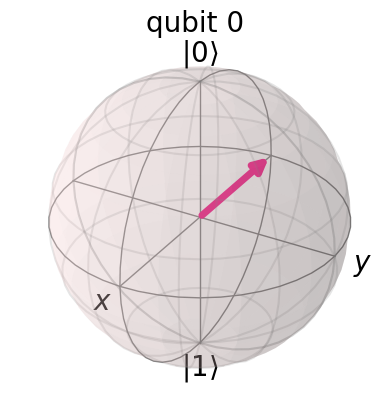

In [35]:
initial_state.draw(output = 'bloch')

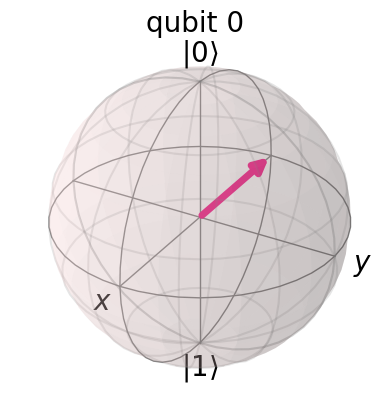

In [36]:
final_state.draw(output = 'bloch')

Simulating the full bit-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0
1. Combining the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
2. Comparing the initial and final statevector.

##### **1. Combining the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

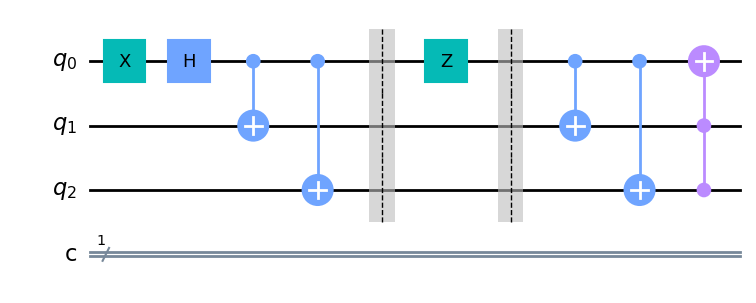

In [37]:
full_code = QuantumCircuit(3, 1)

# ENCODING
# Initial state of |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()

# Phase-flip Error
full_code.z(0)
full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [38]:
initial_state.equiv(final_state)

False

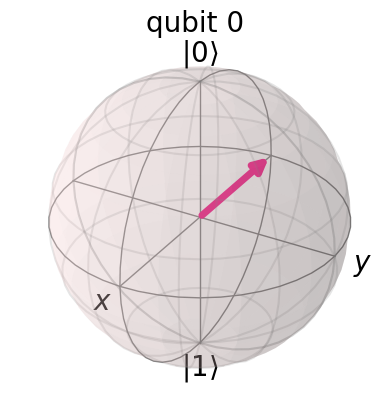

In [39]:
initial_state.draw(output = 'bloch')

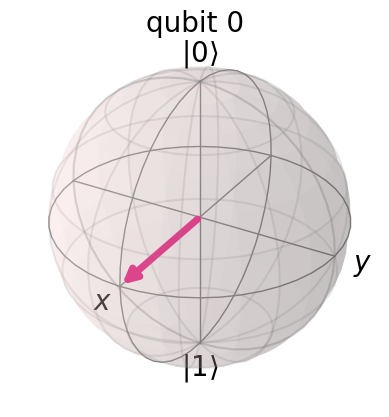

In [40]:
final_state.draw(output = 'bloch')

## **Part 2: Implementing the Shor Code**
---

In this section, I have built on the work from the last section to implement Shor's code in full.

Initializing a circuit with 9 qubits.

The code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

In [41]:
shor_encode = QuantumCircuit(9,1)

I have used every 3rd qubit for the phase-flip code.

In [42]:
shor_encode = shor_encode.compose(phaseflip_encode, qubits = [0,3,6])

I have encoded each of the phase-flip code qubits using their own bit-flip code.

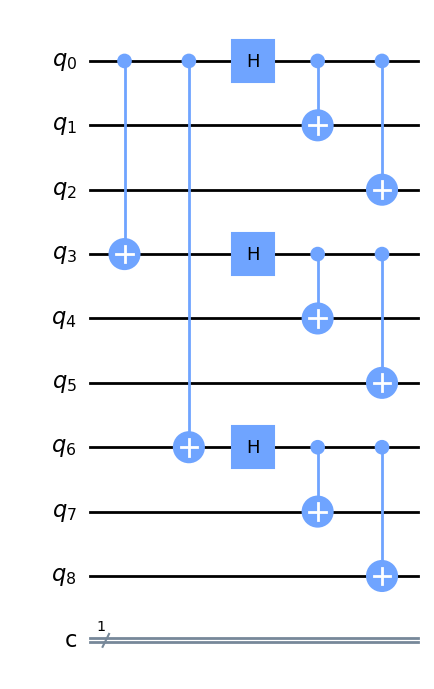

In [43]:
shor_encode = shor_encode.compose(bitflip_encode, qubits = [0,1,2])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [3,4,5])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [6,7,8])
shor_encode.draw()

Initializing the correcting circuit with the 9 qubits.

In [44]:
shor_correct = QuantumCircuit(9,1)

Correcting any bit-flips.

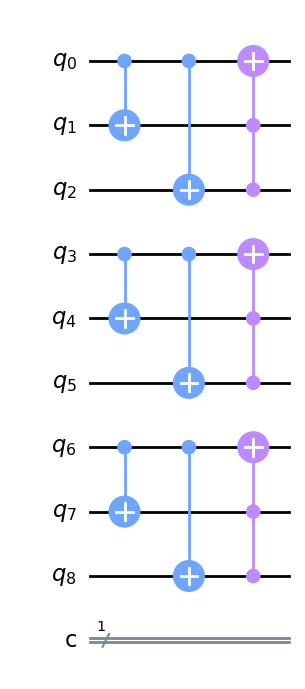

In [45]:
shor_correct = shor_correct.compose(bitflip_correct, qubits = [0,1,2])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [3,4,5])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [6,7,8])
shor_correct.draw()

Correcting any phase-flips.

In [46]:
shor_correct = shor_correct.compose(phaseflip_correct, qubits = [0,3,6])

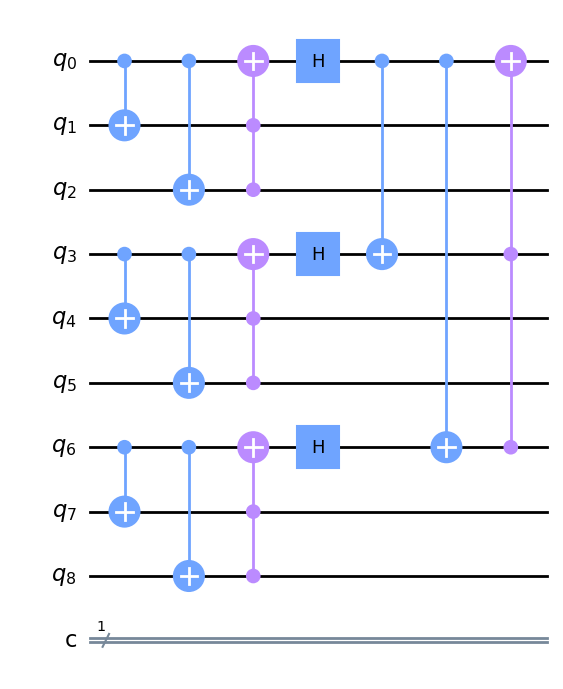

In [47]:
shor_correct.draw()

**Verification of the implementation**

###### **1. Combining the encoding and correcting circuits using `.compose(...)`.**

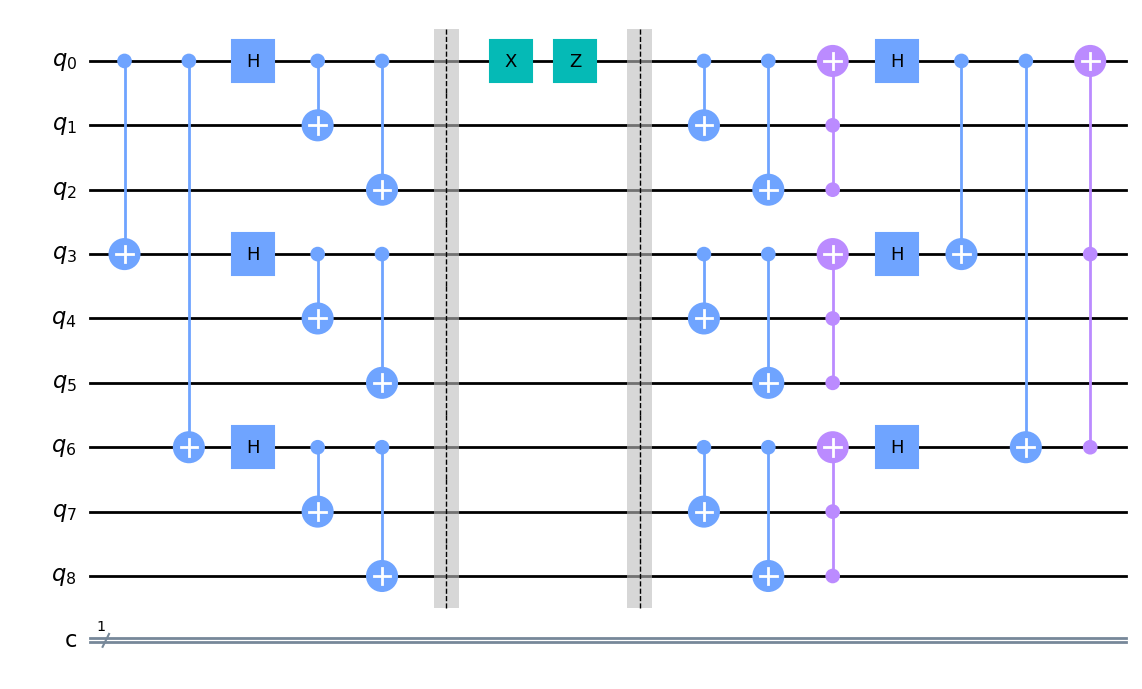

In [48]:
full_code = QuantumCircuit(9)

# ENCODING

# Preparing the initial state and save its statevector
# Preparing qubit q0 in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


# Bit-flip and phase-flip errors

full_code.x(0)
full_code.z(0)

full_code.barrier()


# DETECTION AND CORRECTION

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [49]:
initial_state.equiv(final_state)

True

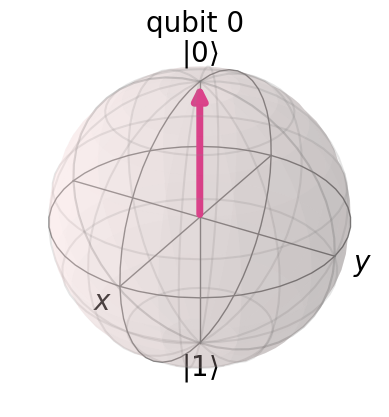

In [50]:
initial_state.draw(output = 'bloch')

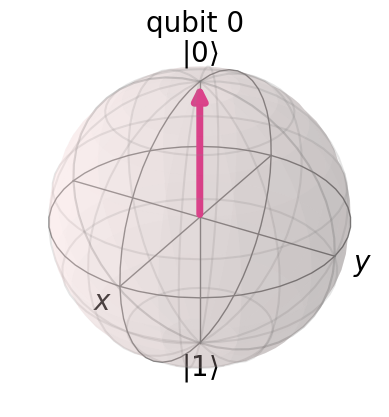

In [51]:
final_state.draw(output = 'bloch')

Breaking the error correcting code by adjusting code in the Errors section.
There are 2 valid ways to break this code: 
1. The qiskit code runs, but the initial and final states do not match.
2. The qiskit code itself doesn't run and gives the following output: ```QiskitError: 'Density matrix is not a pure state'```. 
The second error is a sign of a change in the quantum state so serious that the qiskit function for creating the statevector effectively fails. In quantum physics, this particular change is called going from a "pure state" to a "mixed state".

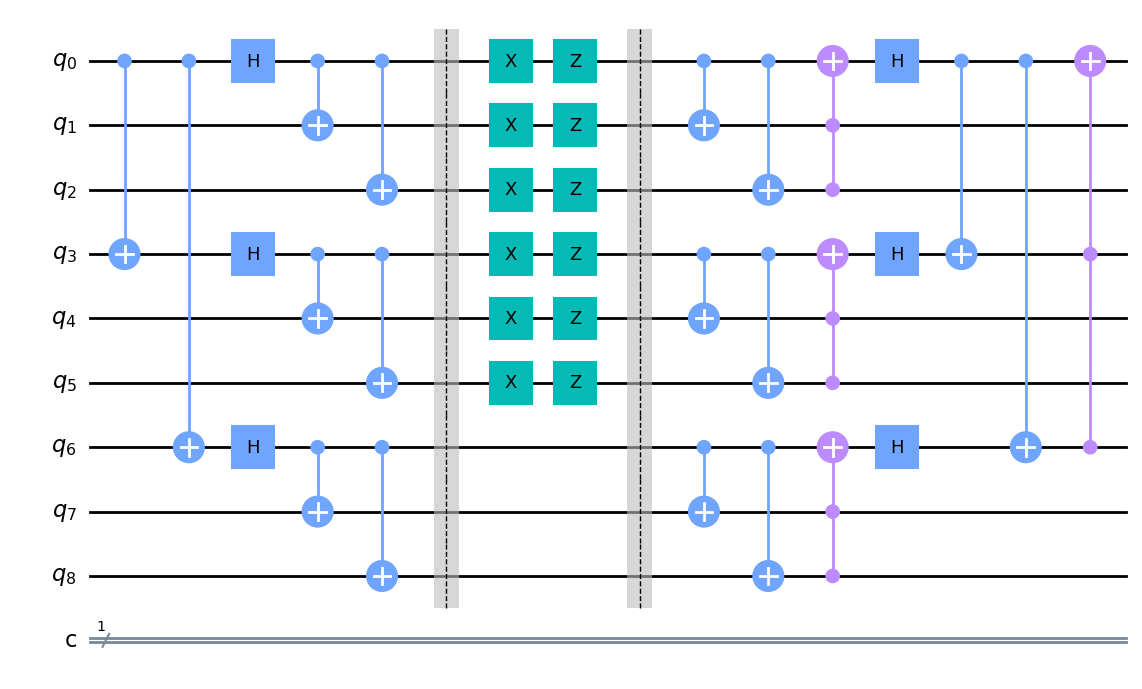

In [52]:
full_code = QuantumCircuit(9)

# ENCODING
# Preparing the initial state and saving its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()

# ERRORS
full_code.x(0)
full_code.z(0)

full_code.x(1)
full_code.z(1)

full_code.x(2)
full_code.z(2)

full_code.x(3)
full_code.z(3)

full_code.x(4)
full_code.z(4)

full_code.x(5)
full_code.z(5)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Saving the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()


full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [53]:
initial_state.equiv(final_state)

False

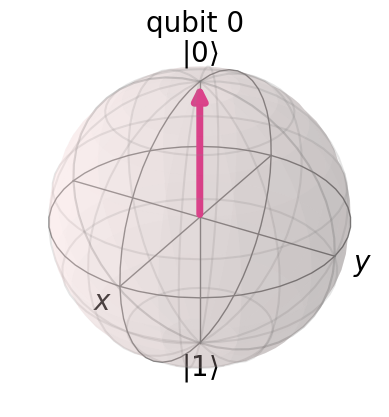

In [54]:
initial_state.draw(output = 'bloch')

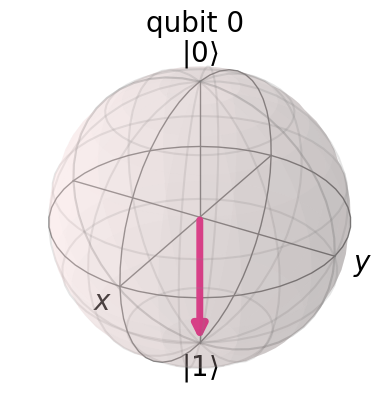

In [55]:
final_state.draw(output = 'bloch')

In [56]:
print("Simulation of QiskitError: 'Density matrix is not a pure state'\n")
print("The code has been commented so that the remaining cells in the notebook below continue running smoothly")

Simulation of QiskitError: 'Density matrix is not a pure state'

The code has been commented so that the remaining cells in the notebook below continue running smoothly


In [57]:
#full_code = QuantumCircuit(9)

# ENCODING
# Prepare the initial state and save its statevector
# Prepare in the |0> state

#initial_state = Statevector.from_instruction(full_code)
#initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

#full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
#full_code.barrier()


# ERRORS
#for i in range(4):
#    full_code.h(i)
#    full_code.z(i)

#full_code.barrier()

# DETECTION AND CORRECTION

#full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Saving the final statevector for comparison to the initial one
#final_state = Statevector.from_instruction(full_code)
#final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
#full_code.draw()

In [58]:
print("The entire error was as follows: \n\n")
print("Traceback (most recent call last):"+
  "Cell In[186], line 35"+
    "final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()"+
  "File /opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/densitymatrix.py:813 in to_statevector"+
    "raise QiskitError(\"Density matrix is not a pure state\")"+
"QiskitError: 'Density matrix is not a pure state'"+

"Use %tb to get the full traceback.")

The entire error was as follows: 


Traceback (most recent call last):Cell In[186], line 35final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()File /opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/densitymatrix.py:813 in to_statevectorraise QiskitError("Density matrix is not a pure state")QiskitError: 'Density matrix is not a pure state'Use %tb to get the full traceback.


Simulating the Shor code for bit and phase-flip errors that occur 10% of the time.

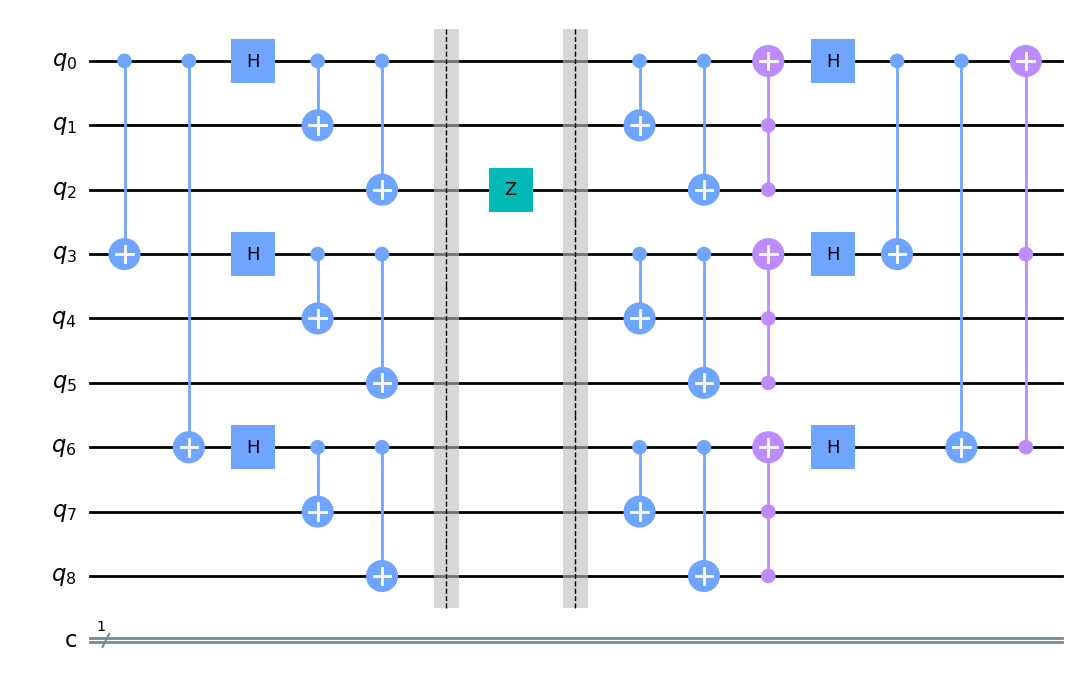

In [59]:
full_code = QuantumCircuit(9)

# ENCODING
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()

# ERRORS
for i in range(9):
  if random() < 0.10:
    full_code.x(i)
  if random() < 0.10:
    full_code.z(i)

full_code.barrier()

# DETECTION AND CORRECTION
full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

###### **2. Comparing the initial and final statevector.**

In [60]:
initial_state.equiv(final_state)

True

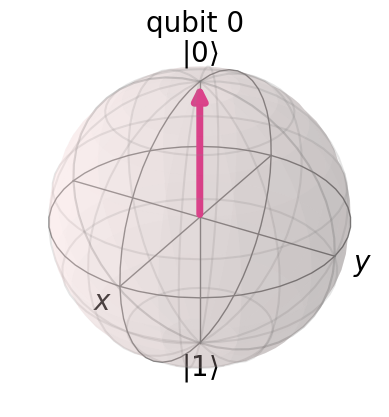

In [61]:
initial_state.draw(output = 'bloch')

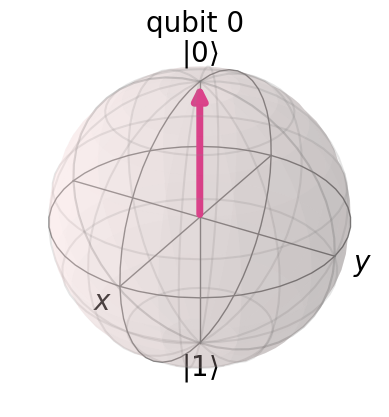

In [62]:
final_state.draw(output = 'bloch')

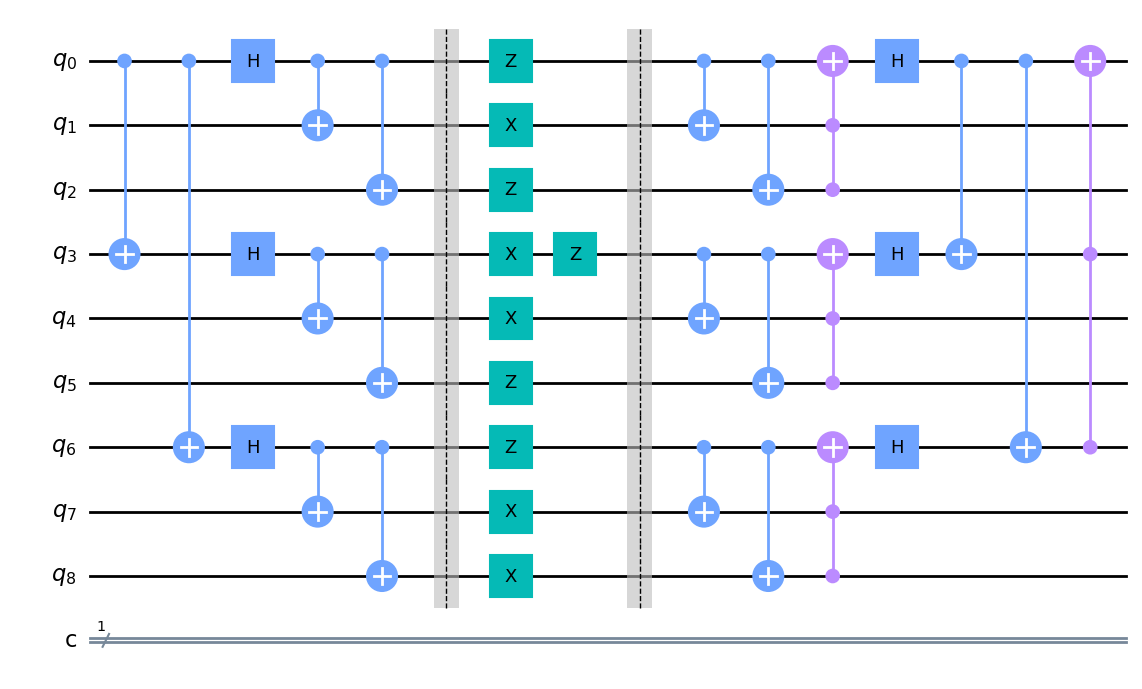

In [63]:
probability = 0.70

full_code = QuantumCircuit(9)

# ENCODING
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()

# ERRORS
for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Comparing the initial and final statevector.**

In [64]:
initial_state.equiv(final_state)

True

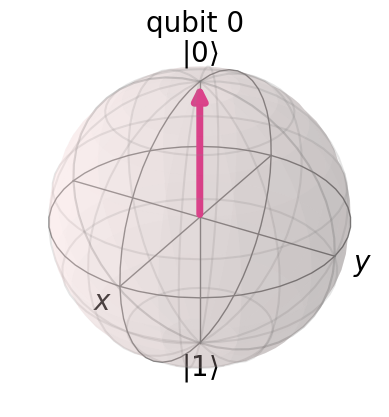

In [65]:
initial_state.draw(output = 'bloch')

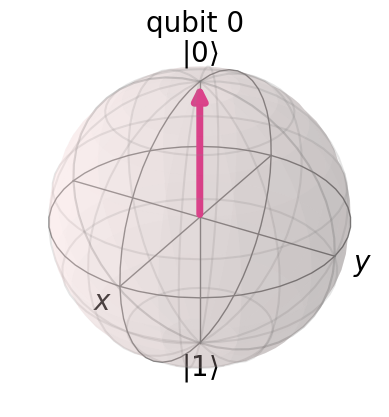

In [66]:
final_state.draw(output = 'bloch')

## **Part 3: Analzying the Shor Code**
---

In this section, I will analyze error correction simulations using an important measurement in quantum physics: **state fidelity**. This measures how close two quantum states are to each other on a scale of 0 (completely different) to 1 (the same).

**The code below is for calculating the fidelity between two qubits that are both in the $|0\rangle$ state (represented in vector notation).**

In [67]:
state_fidelity([1, 0], [1, 0])

1.0

Calculating the state fidelity between the $|0\rangle$ and $|1\rangle$ states.

In [68]:
state_fidelity([1, 0], [0, 1])

0.0

Calculating the state fidelity between the $|1\rangle$ and $|0\rangle$ states to determine if the order of states matters.

In [69]:
state_fidelity([0, 1], [1, 0])

0.0

Calculating the state fidelity between the $|0\rangle$ and $|+\rangle$ states.

In [70]:
import math
state_fidelity([1,0], [1/math.sqrt(2),1/math.sqrt(2)])

0.4999999999999999

Calculating the state fidelity between the $|0\rangle$ and $|-\rangle$ states.

In [71]:
state_fidelity([1,0], [1/math.sqrt(2),-1/math.sqrt(2)])

0.4999999999999999

Calculating the state fidelity between the $|1\rangle$ and $|-\rangle$ states.

In [72]:
qc = QuantumCircuit(1)
qc.x(0)
initial_state = Statevector.from_instruction(qc)
qc.h(0)
final_state = Statevector.from_instruction(qc)

state_fidelity(initial_state, final_state)

0.4999999999999999

Code to calculate the state fidelity between the $|00\rangle$ and $|\beta_{00}\rangle = \frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$ states.

In [73]:
qc = QuantumCircuit(2)
initial_state = Statevector.from_instruction(qc)


qc.h(0)
qc.cx(0,1)
final_state = Statevector.from_instruction(qc)
state_fidelity(initial_state, final_state)

0.4999999999999999

Calculating the state fidelity between the initial and final states of the above Shor code with both bit-flip and phase-flip errors present.

In [74]:
full_code = QuantumCircuit(9)

# ENCODING
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()

# ERRORS
full_code.x(0)
full_code.z(0)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

print(state_fidelity(initial_state, final_state))
print("The state fidelity of initial and final state is 1 as the error correction makes sure that \nthe final state "+
      "remains the same as the initial state.")

1.0
The state fidelity of initial and final state is 1 as the error correction makes sure that 
the final state remains the same as the initial state.


Calculating the state fidelity between the initial and final states from above Shor code where probability of an error occuring is 60%

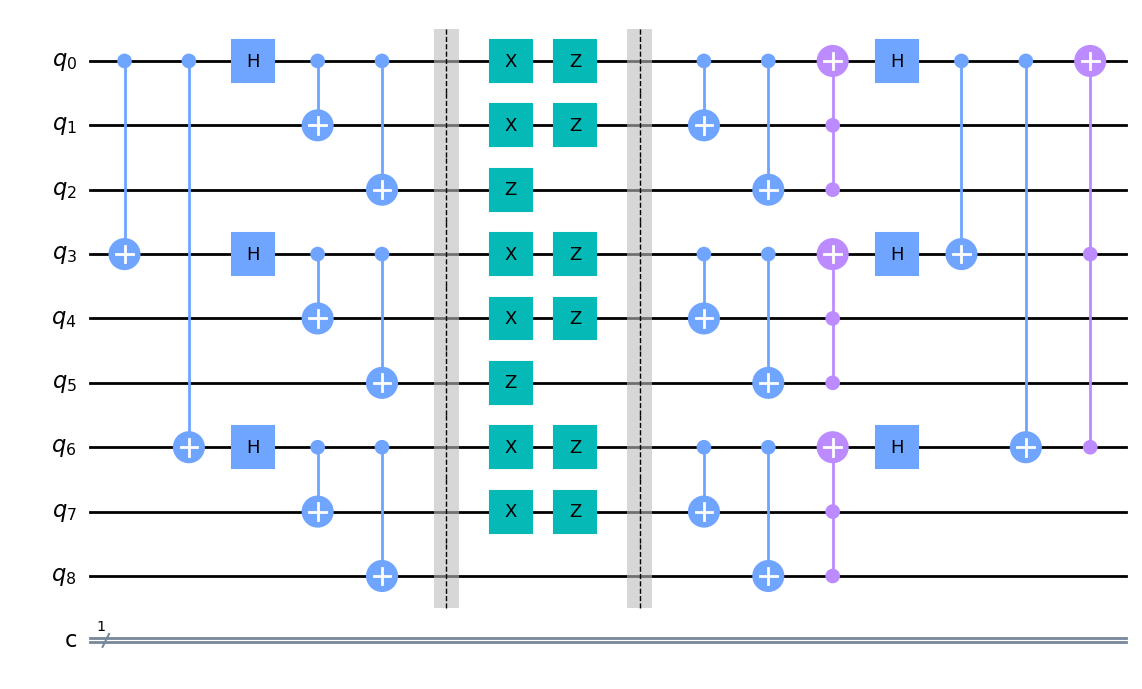

In [75]:
probability = 0.60

full_code = QuantumCircuit(9)
# ENCODING
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()

# ERRORS
for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()

# DETECTION AND CORRECTION

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

In [76]:
state_fidelity(initial_state, final_state)

3.680050034621245e-103

In [77]:
print("As the probability of errors increases, the state fidelity tends to decrease. "
      +"\nIncreasing the probability of introducing errors "
      +"\nleads to a higher chance of the final state being different from the initial state."
      +"\nThe value of state fidelity is an extremely small value close to zero")

As the probability of errors increases, the state fidelity tends to decrease. 
Increasing the probability of introducing errors 
leads to a higher chance of the final state being different from the initial state.
The value of state fidelity is an extremely small value close to zero


Function that takes in a paramater, `probability`, and returns the fidelity before and after running the Shor code with errors that occur with the given probability. This section is required to plot the next section.

In [78]:
probability = 0.2

def get_fidelity(probability):
    
    full_code = QuantumCircuit(9)
    
    # ENCODING
    # Prepare the initial state and save its statevector
    # Prepare in the |0> state
    
    initial_state = Statevector.from_instruction(full_code)
    initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
    
    full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
    full_code.barrier()
    
    
    # ERRORS
    for i in range(9):
      if random() < probability:
        full_code.x(i)
      if random() < probability:
        full_code.z(i)
    
    full_code.barrier()
    
    
    # DETECTION AND CORRECTION
    full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
    
    # Save the final statevector for comparison to the initial one
    final_state = Statevector.from_instruction(full_code)
    final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
    return (state_fidelity(initial_state, final_state))

get_fidelity(probability)

3.680050034621245e-103

The code below graphs the *average* state fidelity using the Shor code with increasing probability of errors.

It simulates many quantum circuits (technically `num_points` * `num_trials_per_point` circuits).

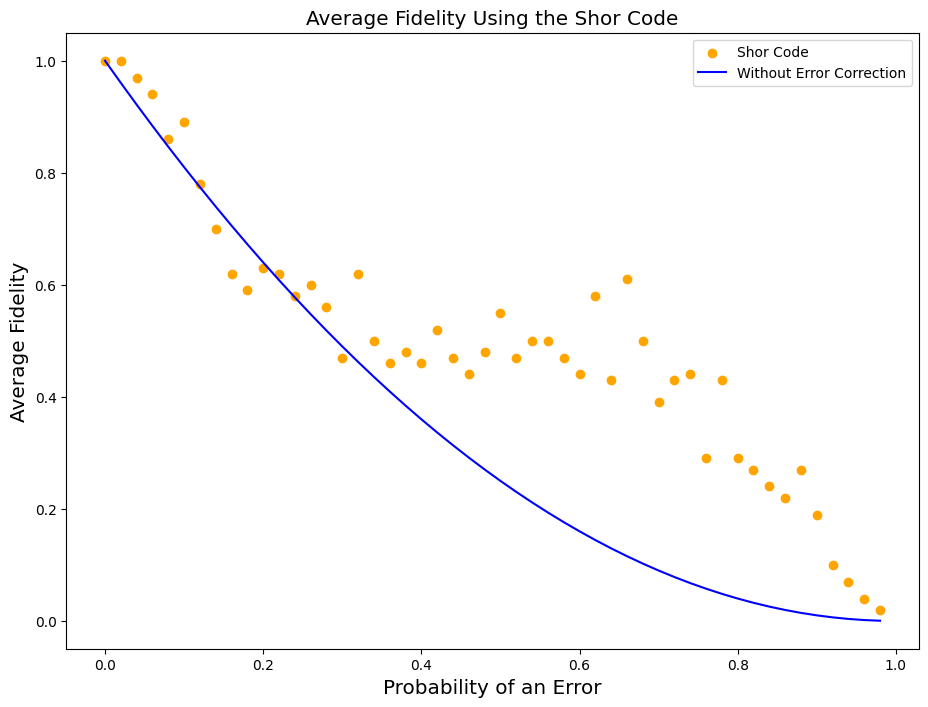

In [79]:
num_points = 50
num_trials_per_point = 100
average_fidelities_shor = []
probabilities = [p / num_points for p in range(num_points)]

for probability in probabilities:

  average_fidelity = 0
  for trial in range(num_trials_per_point):
    average_fidelity += get_fidelity(probability)

  average_fidelity /= num_trials_per_point
  
  average_fidelities_shor  += [average_fidelity]



plt.figure(figsize = (11, 8))
plt.scatter(probabilities, average_fidelities_shor, label = 'Shor Code', color = 'orange')
plt.plot(probabilities, [(1 - p)**2 for p in probabilities], label = 'Without Error Correction', color = 'blue')


plt.title("Average Fidelity Using the Shor Code", fontsize = 'x-large')
plt.xlabel("Probability of an Error", fontsize = 'x-large')
plt.ylabel("Average Fidelity", fontsize = 'x-large')
plt.legend()
plt.show()

Summary:
The project was broken up into smaller modules, first I implemented both the phase-flip's encode and correction code, combined them using compose function and then checked for phase-flip and bit-flip errors (where it failed). Similarly bit-flip's code was written and checked for error correction. In part 2, first I wrote the encode for phase-flip and then bit-flip which combined makes the Shor's encode. Then the Shor's correction code for bit-flip and phase-flip was written. Both phase-flip and bit-flip errors were simulated and the code was tested. Then I determined two ways to break the code, one was that the final and initial states don't match and other was 'Density matrix is not a pure state', by introducing additional errors that the code couldn't handle. ThenI introduced errors based on probability of it occuring. Finally in part 3, I analyzed the Shor's code based on state fidelity and plotted the graph of average fidelity vs probability of errors for Shor code and code without error correction.


1. Comparison of Shor code to using no error correction and noticeable trends.

Initially for probabilities from 0% to 30%, the Shor code's average fidelity is better or almost similar to that of using no error correction. As the probability reaches around 30% to 70% the Shor code's average fidelity forms almost forms a plateau in it's curve whereas the average fidelity of code without error correction continues its downward trend, indicating that the Shor code still has better performance and has a high chance to mitigate errors, better than code with no error correction. After 70%, the Shor code's average fidelity stays above the blue colored curve however it follows a downward trend.


2. Change in average fidelity change with increasing probability of errors when using Shor code.

Initially for probabilities below 30%, the performance of Shor code to correct errors and have better average fidelity (1 or closer to 1), is better than or almost similar to that of code with no error correction. Between 30% and 70% the curve becomes a plateau where the average fidelity is around 0.5 and then it drops down after that.


3. Unexpected patterns in the average fidelity.

The unusual pattern noticed here is the Shor code's average fidelity that's approximately 0.5 for probabilities between 30% and 70%. This might be because the introduction of errors based on probability is still random and in case lesser errors are introduced because of this, they can be still be corrected by Shor code and the fidelity doesn't drop down immediately.